In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from skimage import measure
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage import io
from skimage.feature import greycomatrix, greycoprops

In [20]:
image = io.imread("dataset045/有癌细胞/01_17_22.png")
PATCH_SIZE = 30

cancer_locations = [(10, 210), (140, 100), (170, 140), (90, 310)]
cancer_patches = []
for loc in cancer_locations:
    cancer_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from nuclei areas of the image
normal_locations = [(450, 10), (150, 330), (290, 450), (450, 470)]
normal_patches = []
for loc in normal_locations:
    normal_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

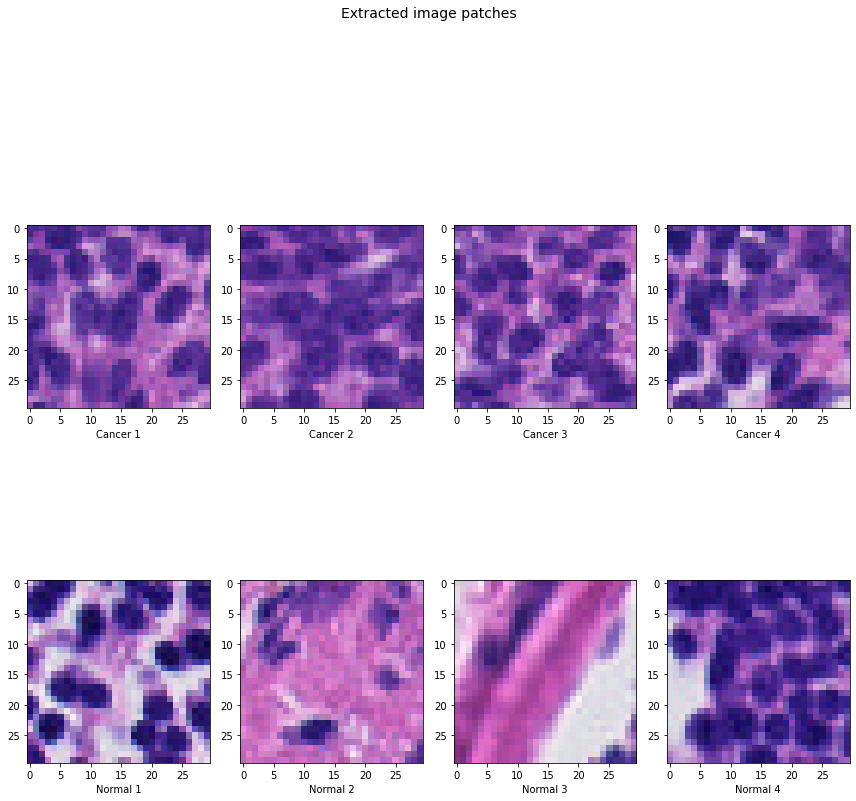

In [21]:
fig = plt.figure(figsize=(12, 12))

for i, patch in enumerate(cancer_patches):
    ax = fig.add_subplot(2, len(cancer_patches), i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cancer %d' % (i + 1))

for i, patch in enumerate(normal_patches):
    ax = fig.add_subplot(2, len(cancer_patches), len(cancer_patches) + i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Normal %d' % (i + 1))


# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [6]:
# pip uninstall radiomics

Found existing installation: radiomics 0.1
Uninstalling radiomics-0.1:
  Would remove:
    /Users/jiaqiwu/opt/anaconda3/lib/python3.8/site-packages/radiomics-0.1.dist-info/*
    /Users/jiaqiwu/opt/anaconda3/lib/python3.8/site-packages/radiomics/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [22]:
from radiomics import featureextractor
import os

In [32]:
testCase = ''

In [37]:
dataDir = os.path.join(os.getcwd(), "/dataset045/有癌细胞")
print ("dataDir, relative path:", dataDir)
print("dataDir, absolute path:", os.path.abspath(dataDir))

# Store the file paths of our testing image and label map into two variables
# imagePath = os.path.join(dataDir, testCase + "01_17_22.png")
# labelPath = os.path.join(dataDir, testCase + "01_17_22.png")
imagePath = "dataset045/有癌细胞/01_17_22.png"
labelPath = "dataset045/有癌细胞/01_17_22.png"
image = io.imread(imagePath)

dataDir, relative path: /dataset045/有癌细胞
dataDir, absolute path: /dataset045/有癌细胞


In [38]:
extractor = featureextractor.RadiomicsFeatureExtractor(binWidth=20, sigma=[1, 2, 3], verbose=True)
print("Extraction parameters:\n\t", extractor.settings)
print("Enabled filters:\n\t", extractor.enabledImagetypes)
# Specify some additional features in the GLCM feature class
extractor.enableFeaturesByName(glcm=[])
print("Enabled features:\n\t", extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 20, 'sigma': [1, 2, 3], 'verbose': True}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [39]:
result = extractor.execute(imagePath, labelPath)

ValueError: Label (1) not present in mask. Choose from [  7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]